In [1]:
using HDF5
using Plots
using GR

function read_snap(filename :: String)
    
    pos  = h5read(filename,"PartType0/Coordinates")
    Bfl  = h5read(filename,"PartType0/Bfield") 
    Vel  = h5read(filename,"PartType0/Velocities")
    alp  = h5read(filename,"PartType0/EPalpha")
    bet  = h5read(filename,"PartType0/EPbeta")
    divB = h5read(filename,"PartType0/divB")
    #Ids  = h5read(filename,"PartType0/ParticleIDs")
    h    = h5read(filename,"PartType0/SmoothingLengths")
    rho  = h5read(filename,"PartType0/Densities")
    head = h5readattr(filename,"Header")

    print("Leyendo ",filename," at time: ",head["Time"],"\n")
    x = pos[1,:]
    y = pos[2,:]
    z = pos[3,:]
    bx = Bfl[1,:]
    by = Bfl[2,:]
    bz = Bfl[3,:]
    Vx = Vel[1,:]
    Vy = Vel[2,:]
    Vz = Vel[3,:]
    
    v2 = Vx.*Vx.+Vy.*Vy.+Vz.*Vz
    b2 = by.*by.+by.*by.+bz.*bz
    
    Npart=size(b2,1)
        
    print("Min x:",minimum(x)," / Max x:",maximum(x),"\n")
    print("Min y:",minimum(y)," / Max y:",maximum(y),"\n")
    print("Min z:",minimum(z)," / Max z:",maximum(z),"\n")
    print("Min h:",minimum(h)," / Max h:",maximum(h),"\n")
    (Dict(:H => head, :x=>pos, :bfl=> Bfl, :b2=>b2, :v=>Vel, :v2=>v2, 
            :divB=>divB, :rho=>rho, :hsml=>h,:bet=> bet, :alp=>alp,Npart=> Npart))
end

function do_heat(data,what,Nmax)
    #Nmax=128
    #x=x.-minimum(x)
    #y=y.-minimum(y)
    #b2=data[what]
    b2=what
    Npart=size(b2,1)
    Lbox=1.0#+maximum(x)
    A = ones((Nmax, Nmax))*minimum(b2)
    grid = ones((Nmax, Nmax))
    #grid = [Set{Int}() for x=1:Nmax, y=1:Nmax];
    #insert(grid) = p -> push!(grid[trunc(Int, p.x/Lbox*Nmax), trunc(Int, p.y/Lbox*Nmax)], p.n);
    #foreach(insert(grid), data)
    x=data[:x][1,:]
    y=data[:x][2,:]
    for ind = 1:Npart
        i,j = trunc(Int, x[ind]/Lbox*Nmax+1), trunc(Int, y[ind]/Lbox*Nmax+1)
        A[i,j] += b2[ind]
        grid[i,j] += 1 
    end
    #AA=log10.(A./grid)
    AA=(A./grid)
    (AA)
end

do_heat (generic function with 1 method)

In [2]:
#filename="OrszagTangVortex_0002.hdf5"
base=read_snap("NO_FORCE/OrszagTangVortex_0005.hdf5")
run=read_snap("OrszagTangVortex_0005.hdf5")

Leyendo NO_FORCE/OrszagTangVortex_0005.hdf5 at time: [0.25]
Min x:1.5888978996958514e-6 / Max x:0.9999988742166946
Min y:3.4614171246123704e-7 / Max y:0.9999933654215064
Min z:4.05340819010537e-6 / Max z:0.9999998228059069
Min h:0.01433896 / Max h:0.027628923
Leyendo OrszagTangVortex_0005.hdf5 at time: [0.25]
Min x:1.8838328488257616e-6 / Max x:0.999994252820507
Min y:4.997704149939386e-6 / Max y:0.9999995897722841
Min z:1.191750919815604e-5 / Max z:0.9999999393555615
Min h:0.017464302 / Max h:0.030373935


Dict{Any, Any} with 12 entries:
  :bfl   => Float32[-0.207454 -0.240412 … 0.019727 0.0628225; 0.153581 0.279031…
  :rho   => Float32[0.105681, 0.124035, 0.104168, 0.125143, 0.106837, 0.130448,…
  :b2    => Float32[0.0472935, 0.156113, 0.0609199, 0.0684523, 0.0484384, 0.302…
  :v2    => Float32[0.0843934, 0.126937, 0.118384, 0.116879, 0.120759, 0.180273…
  :hsml  => Float32[0.0269778, 0.0255758, 0.0271082, 0.0255, 0.0268789, 0.02514…
  :x     => [0.0395242 0.0791742 … 0.983994 0.972134; 0.0353888 0.0361192 … 0.9…
  :v     => Float32[-0.290373 -0.350046 … -0.133287 -0.155728; 0.00849618 0.065…
  :divB  => Float32[0.0, 0.0, 0.0, 0.0, 0.0, -0.740743, 0.0, 0.0, -0.136155, 0.…
  :H     => Dict{String, Any}("NumPart_Total_HighWord"=>UInt32[0x00000000, 0x00…
  262144 => 262144
  :alp   => Float32[0.0810457, 0.0737331, 0.0775466, 0.073742, 0.0768548, 0.069…
  :bet   => Float32[0.03458, 0.0418864, 0.0598454, 0.0738763, 0.0385987, 0.0141…

Leyendo OrszagTangVortex_0005.hdf5 at time: [0.25]
Min x:1.8838328488257616e-6 / Max x:0.999994252820507
Min y:4.997704149939386e-6 / Max y:0.9999995897722841
Min z:1.191750919815604e-5 / Max z:0.9999999393555615
Min h:0.017464302 / Max h:0.030373935
Invalid keyword: c


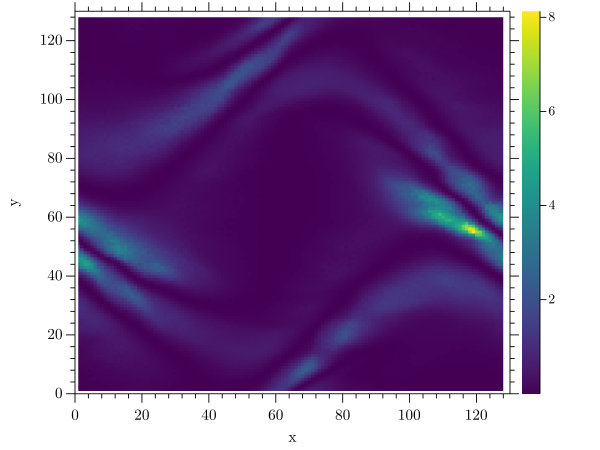

In [6]:
using Plots
gr()
run=read_snap("OrszagTangVortex_0005.hdf5")
Nmax =128
#AA   =do_heat(run,run[:bfl][3,:],Nmax)
EdivB=run[:hsml].*run[:divB]
EdivB=run[:b2]
#EdivB=EdivB/sqrt.(run[:b2].+1E-5)
#AA   =do_heat(run,run[:bfl][1,:],Nmax)
AA   =do_heat(run,run[:b2],Nmax)
GR.heatmap(1:Nmax,1:Nmax,AA,c=cgrad([:blue,:green,:yellow,:red]),xlabel="x", ylabel="y")

In [17]:
gr()
Nmax=128
EdivB=base[:hsml].*base[:divB]
EdibB=base[:b2]
#ABase=do_heat(base,base[:bfl][1,:],Nmax)
ABase=do_heat(base,base[:b2],Nmax)
heatmap(1:Nmax,1:Nmax,ABase,c=cgrad([:blue,:green,:yellow,:red]),xlabel="x", ylabel="y")

LoadError: UndefVarError: heatmap not defined

In [424]:
#shade(run[:b2],run[:rho])

In [526]:
print(minimum(run[:alp]),"\n")
print(minimum(run[:bet]),"\n")
print(maximum(run[:alp]),"\n")
print(maximum(run[:bet]),"\n")
print(minimum(run[:v][1,:]),"\n")
print(minimum(run[:v][3,:]),"\n")
print(maximum(run[:v][1,:]),"\n")
print(maximum(run[:v][3,:]),"\n")

-0.08979354
-0.00019832367
0.089790516
1.0001271
-4.29732
-2.0130806
3.6721537
1.964809
